In [11]:
# !pip install -r requirements.txt

In [12]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
path = os.listdir("Training/")
classes = {"no_tumor" : 0, "Yes" : 1}

In [27]:
path

['.ipynb_checkpoints',
 'no_tumor',
 'pituitary_tumor',
 'requirements.txt',
 'Training.lnk',
 'Yes']

In [28]:
x = []
y = []
for cls in classes:
    path = "Training/"+cls
    for j in os.listdir(path):
        image = cv2.imread(path+"/"+j, 0)
        image = cv2.resize(image, (200, 200))
        x.append(image)
        y.append(classes[cls])
np.unique(y)


array([0, 1])

In [29]:
x = np.array(x)
y = np.array(y)

In [30]:
x[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(200, 200), dtype=uint8)

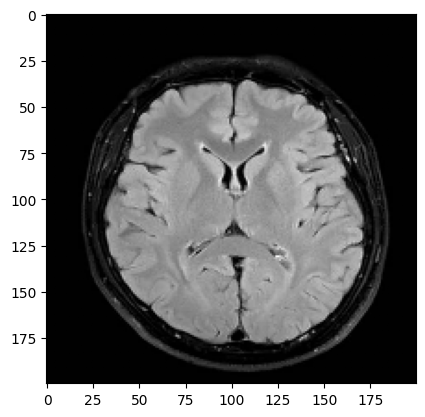

In [31]:
plt.imshow(x[100], cmap = "gray")
plt.show()

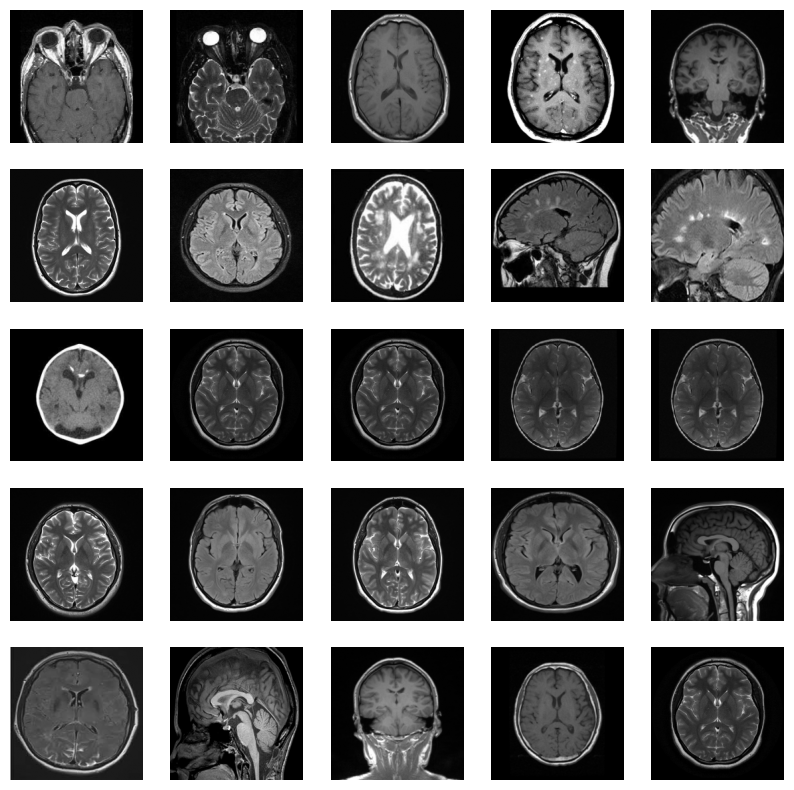

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i], cmap="gray")
    plt.axis("off")

plt.show()

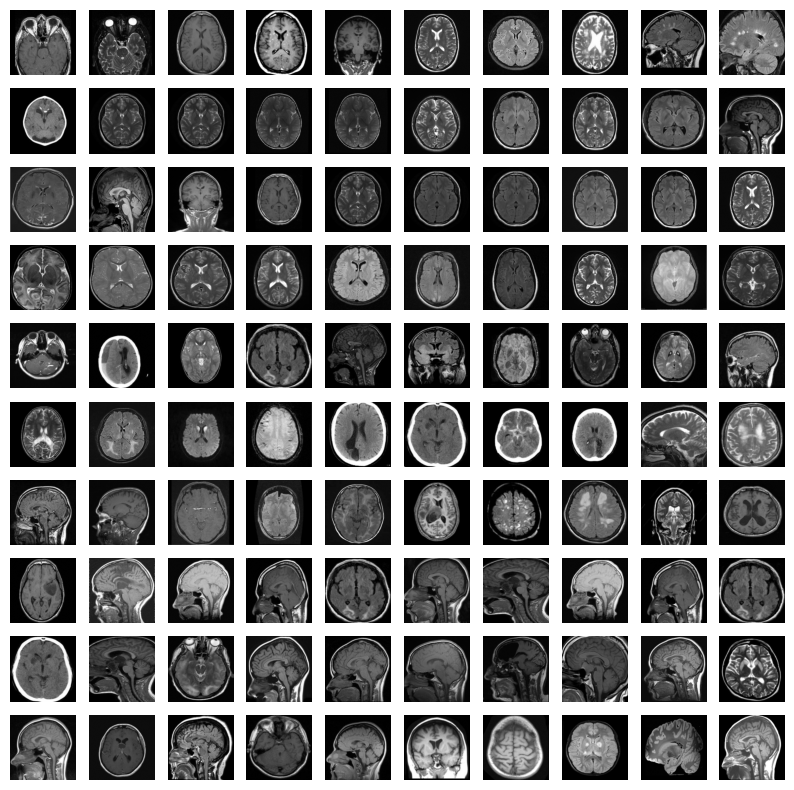

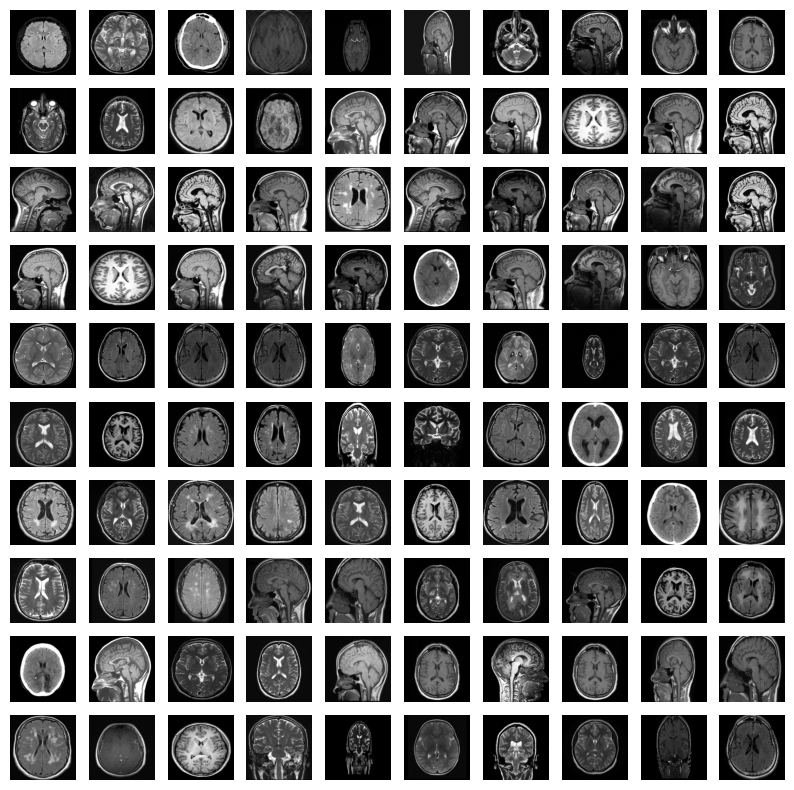

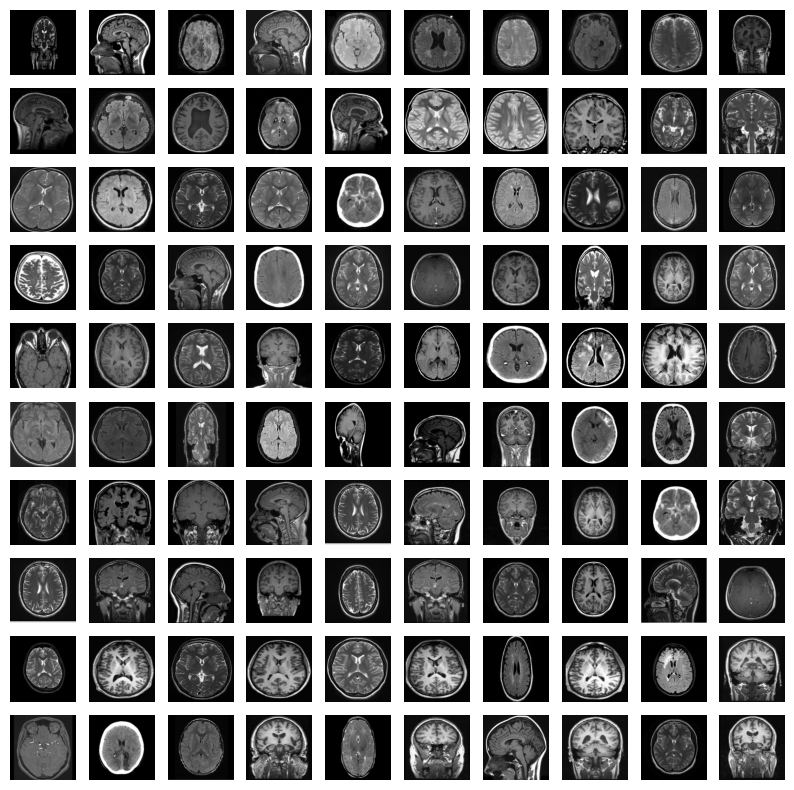

In [33]:

batch_size = 100

for start in range(0, 250, batch_size):
    plt.figure(figsize=(10,10))

    for i in range(batch_size):
        idx = start + i
        if idx >= len(x):
            break

        plt.subplot(10, 10, i+1)
        plt.imshow(x[idx], cmap="gray")
        plt.axis("off")

    plt.show()


In [34]:
updated_x = x.reshape(len(x), -1)

In [35]:
updated_x.shape

(2870, 40000)

In [36]:
y.shape

(2870,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(updated_x,y, test_size = 0.2, random_state = 42)

In [39]:
x_train.shape

(2296, 40000)

In [40]:
x_train.shape

(2296, 40000)

In [41]:
x_train = x_train/255

In [42]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18431373, 0.18431373, 0.18823529, ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(2296, 40000))

In [43]:
x_test = x_test/255

In [44]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.00784314, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03921569, 0.03921569, 0.03921569, ..., 0.03921569, 0.03921569,
        0.03921569]], shape=(574, 40000))

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [53]:
scaler = StandardScaler()


x_train = scaler.fit_transform(x_train)


x_test = scaler.transform(x_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

In [55]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Linear SVC": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [57]:
for model_name, model in models.items():

    print("\n==============================")
    print(f"Model: {model_name}")
    print("==============================")

    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)


Model: Logistic Regression

Model: Random Forest

Model: SVM

Model: Linear SVC


C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model: Decision Tree


In [60]:
accuracy_dict = {}

for name, model in models.items():

    print("\n==============================")
    print("Model:", name)
    print("==============================")

    
    model.fit(x_train, y_train)

    
    y_pred = model.predict(x_test)

    
    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = acc
    print("Accuracy:", acc)



Model: Logistic Regression
Accuracy: 0.9407665505226481

Model: Random Forest
Accuracy: 0.9599303135888502

Model: SVM
Accuracy: 0.9285714285714286

Model: Linear SVC


C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9111498257839721

Model: Decision Tree
Accuracy: 0.9372822299651568


In [61]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 61  17]
 [ 19 477]]


In [62]:
import seaborn as sns 
import joblib 

In [70]:
cm_dict = {}

for name, model in models.items():

    y_pred = model.predict(x_test)
    cm_dict[name] = confusion_matrix(y_test, y_pred)
    

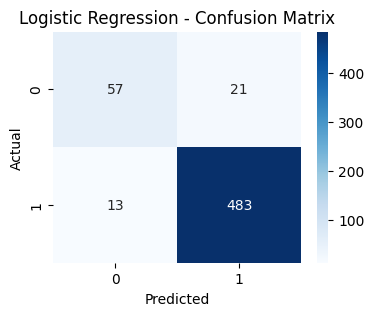

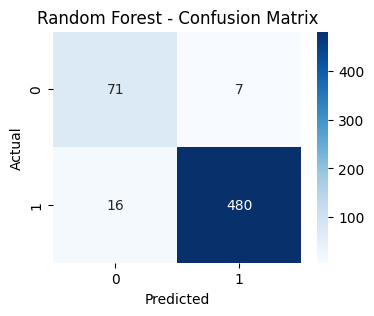

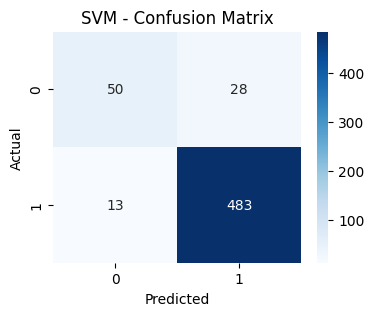

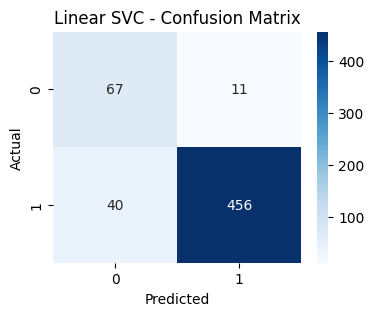

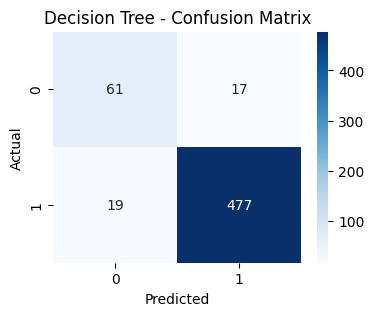

In [71]:
for name, cm in cm_dict.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

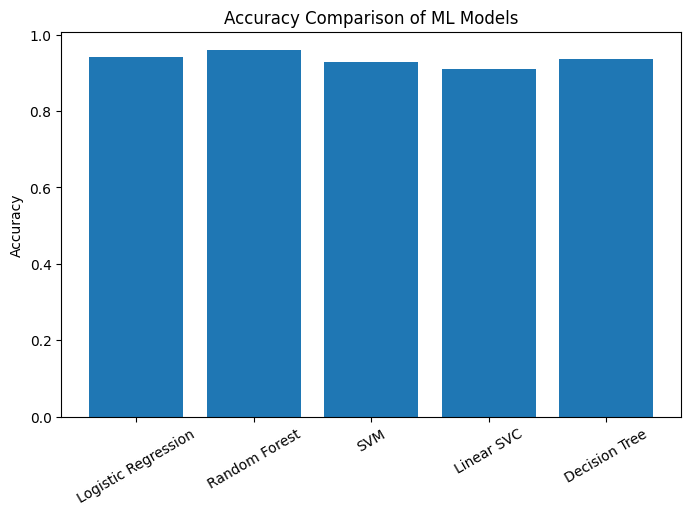

In [72]:
plt.figure(figsize=(8,5))
plt.bar(accuracy_dict.keys(), accuracy_dict.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")
plt.show()

In [73]:

best_model_name = max(accuracy_dict, key=accuracy_dict.get)
best_model = models[best_model_name]

print("Best Model:", best_model_name)

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")


print("Model & Scaler saved successfully!")


Best Model: Random Forest
Model & Scaler saved successfully!


In [74]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']